<a href="https://colab.research.google.com/github/MadmanMarble/GLAP/blob/main/Amanda_Lambert_Assignment_3_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [1]:
%matplotlib inline
import torch
import numpy as np
from IPython import display
from d2l import torch as d2l

In [2]:
#@title Useful function definitions (RUN THIS CELL)
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


##The code cell below shows an example of plotting a function and its derivative where the derivative equation is hand-calculated.


<ipython-input-2-b7307eced3f1>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


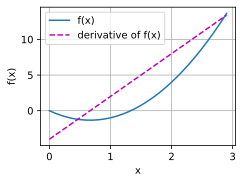

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

x = np.arange(0, 3, 0.1)

plot(x, [f(x), 6 * x - 4], 'x', 'f(x)', legend=['f(x)', 'derivative of f(x)'])

##The code cell below shows the same function and its derivative at a specific value where the derivative  is automatically calculate by PyTorch Autograd.


In [4]:
x = torch.tensor(1.0)
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
y = f(x)
y.backward()
x.grad.item()

2.0

##The code cell below shows the same function and its derivatives at all values in the range where the derivatives are automatically calculates by PyTorch Autograd. The visualization is also shown to match the previous visualization with hand-calculated derivative.

In [5]:
xvals = np.arange(0, 3, 0.1)
grad_vals = []
for val in xvals:
  x = torch.tensor(val)
  x.requires_grad_(True)
  y = f(x)
  y.backward()
  grad_vals.append( x.grad.item() )

<ipython-input-2-b7307eced3f1>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


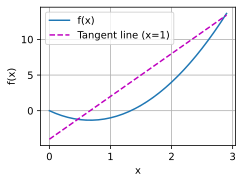

In [6]:
plot(xvals, [f(xvals), grad_vals], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

#Assigned tasks:
Create your own function called ***g(x)*** that is a polynomial of a single variable and some well known functions of that variable (there should be at least one trigonometric function).
Plot this function ***g(x)*** along with its derivative (which you will need to write in code as another function), on a chosen numerical range of values.


<ipython-input-2-b7307eced3f1>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


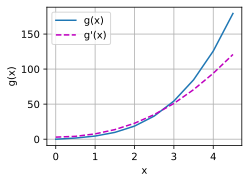

In [7]:
# Define function g(x)
def g(x):
    return 2 * x ** 3 + 3 * np.sin(x)

# Define the derivative of function g(x)
def g_prime(x):
    return 6 * x ** 2 + 3 * np.cos(x)

# Range of values
x = np.arange(0, 5, 0.5)
# x = np.arange(0, 3, 0.1)

plot(x, [g(x), g_prime(x)], 'x', 'g(x)', legend=['g(x)', 'g\'(x)'])

#Assigned tasks:
Create a function ***h(x)*** which is the product of ***f(x)*** given in the notebook and your own function ***g(x)***. Plot this function ***h(x)*** along with its derivative, on a chosen numerical range of values. **However this time you must use the PyTorch autograd to compute the gradient, not the hand-calculated gradient.**



<ipython-input-2-b7307eced3f1>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


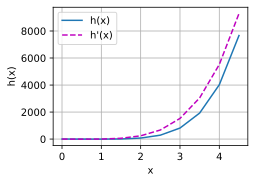

In [8]:
# Define f(x) as given
def f(x):
    return 3 * x ** 2 - 4 * x

# Define g(x) using torch tensors
def g_torch(x):
    return 2 * x ** 3 + 3 * torch.sin(x)

# Define h(x) as the product of f(x) and g(x)
def h(x):
    return f(x) * g_torch(x)

# Calculate the derivative of h(x) using autograd
xvals = np.arange(0, 5, 0.5)
grad_vals = []
h_vals = []

for val in xvals:
    x = torch.tensor(val)
    x.requires_grad=True
    y = h(x)
    y.backward()
    grad_vals.append(x.grad.item())
    h_vals.append(y.item())

plot(xvals, [h_vals, grad_vals], 'x', 'h(x)', legend=['h(x)', 'h\'(x)'])